In [0]:
#Nick Fraso and Matt Xi project

In [0]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Independant variable X: starting median salary
# Dependant variable Y: mid career salary

In [0]:
Salary = pd.read_csv("salary.csv")
Salary.head()


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Unnamed: 8,Unnamed: 9
0,Massachusetts Institute of Technology (MIT),Engineering,72200,126000,76800,99200,168000,220000,NaN,NaN
1,California Institute of Technology (CIT),Engineering,75500,123000,100000,104000,161000,100000,NaN,NaN
2,Harvey Mudd College,Engineering,71800,122000,100000,96000,180000,100000,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400,114000,66800,94300,143000,190000,NaN,NaN
4,Cooper Union,Engineering,62200,114000,100000,80200,142000,100000,NaN,NaN


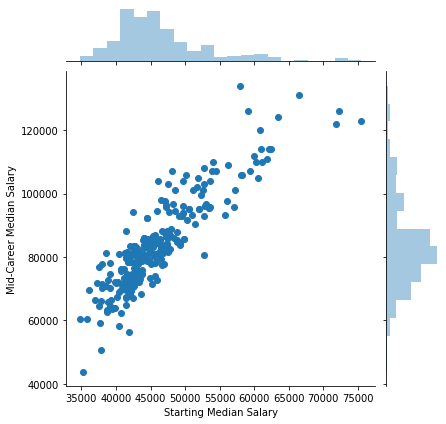

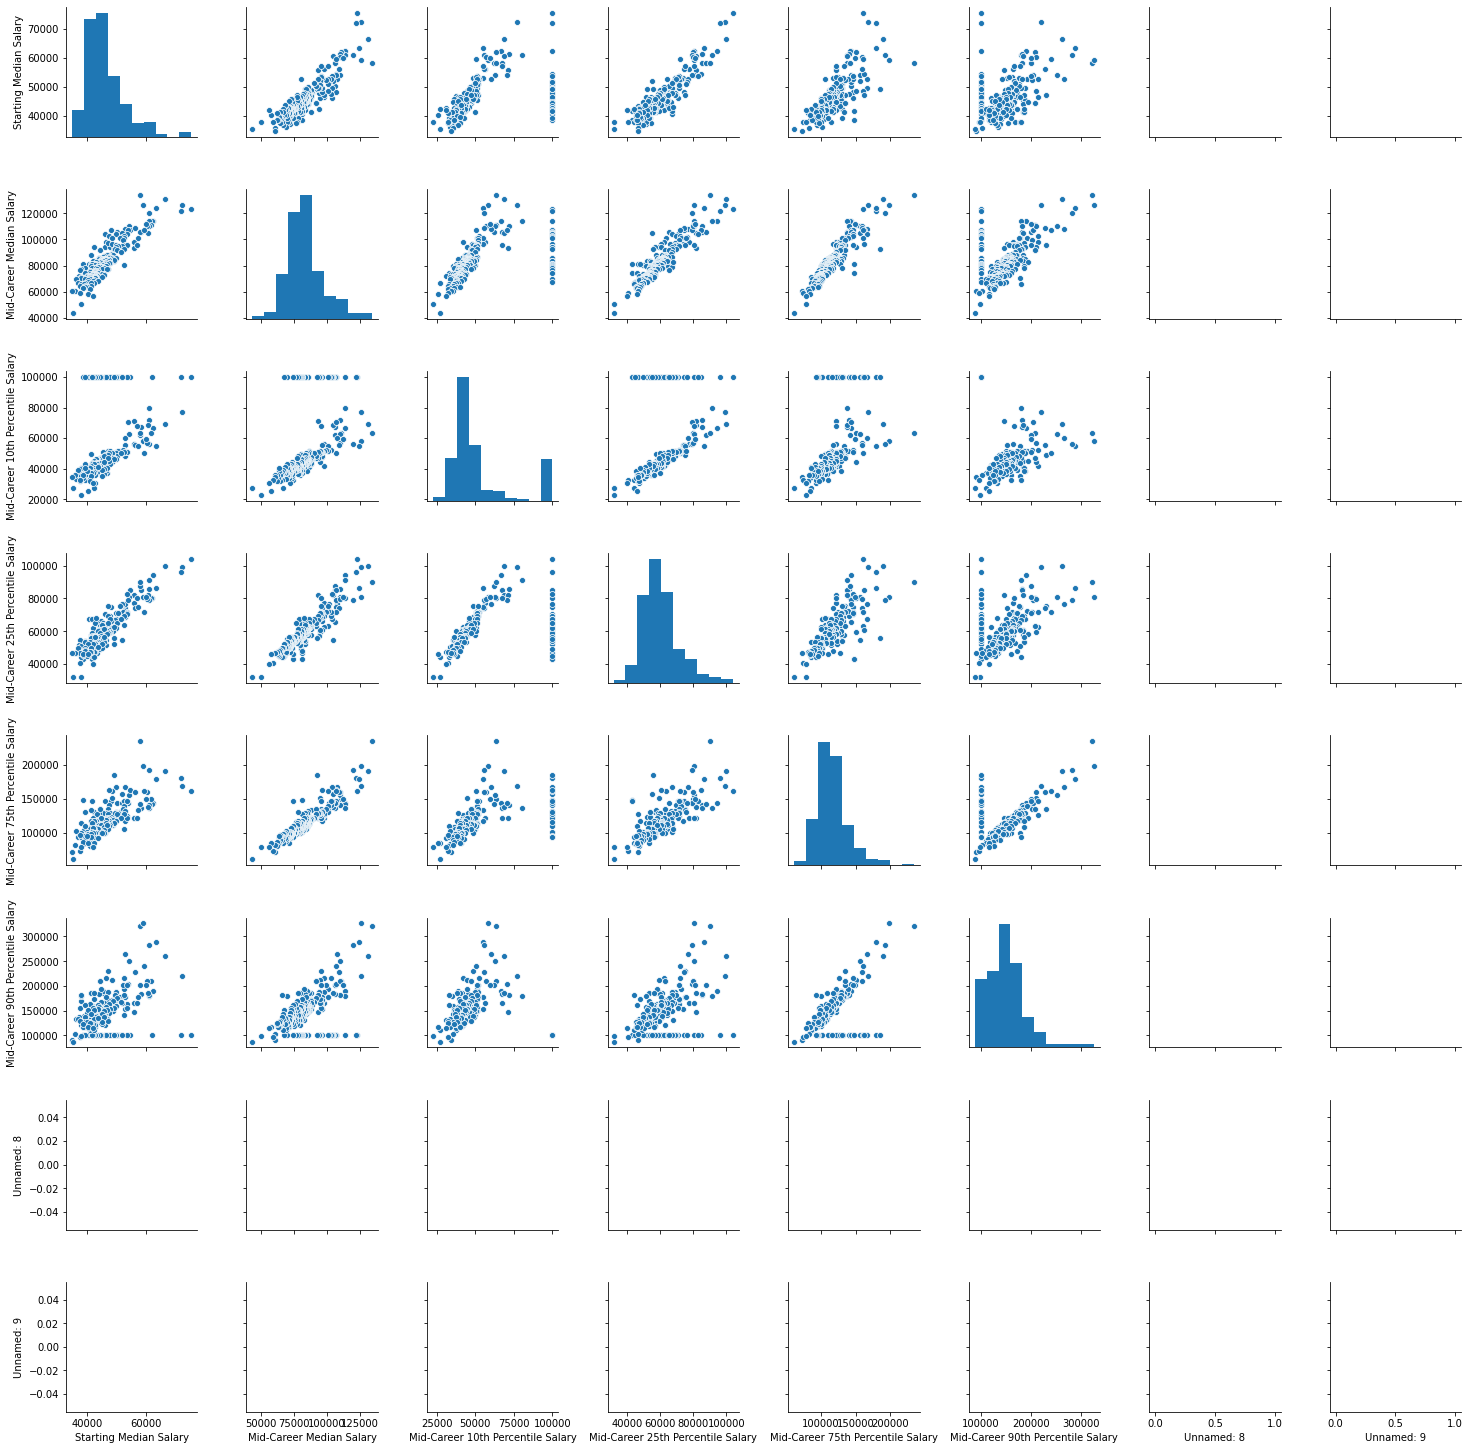

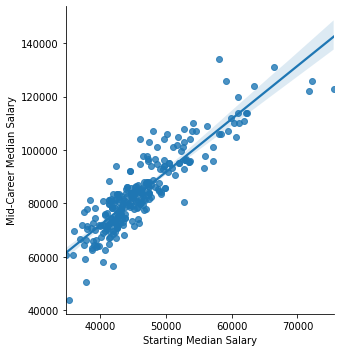

In [0]:
sns.jointplot(x='Starting Median Salary', y='Mid-Career Median Salary', data = Salary)
sns.pairplot(Salary)
sns.lmplot(x='Starting Median Salary', y='Mid-Career Median Salary', data=Salary)


In [0]:
y = Salary['Mid-Career Median Salary']
X = Salary[['Starting Median Salary']]

from sklearn.model_selection import train_test_split

#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:

X_train.shape

from sklearn.linear_model import LinearRegression

#instatiation of an object out of our class
#when "fit_intercept = True" - asking the model to obtain intercept which is value of 'm' and 'b'
#when "fit_intercept = False" - model will obtain only the 'm' value; 'b' will be zero by default
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)



Linear Model Coefficient (m):  [1.95619446]
Linear Model Coefficient (b):  -5988.321662732022


In [0]:
y_predict = regressor.predict( X_test)
y_predict
y_test


214     73000
49     103000
122     86900
90     120000
221     72100
        ...  
151     82900
119     87800
23      92200
106     95600
60      88300
Name: Mid-Career Median Salary, Length: 68, dtype: int64

Text(0.5, 1.0, 'starting vs idcareer salry')

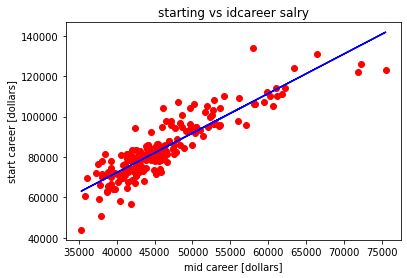

In [0]:

#VISUALIZE TRAIN SET RESULTS
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')q  
plt.ylabel('Start career [dollars]')
plt.xlabel('Mid career [dollars]')
plt.title('Starting vs Midcareer salry')


Text(0.5, 1.0, 'starting vs idcareer salry')

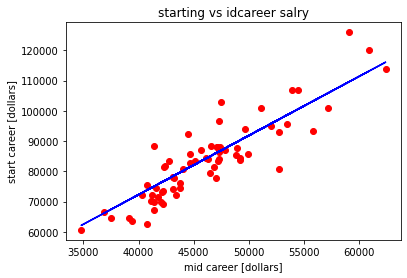

In [0]:

#VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Start career [dollars]')
plt.xlabel('Mid career [dollars]')
plt.title('Starting vs Midcareer salry')


In [0]:
#IMPORT LIBRARIES
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#INITALIZIE AND FIT MODEL
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
linear = reg.score(X_test,y_test)

#y_predict = regressor.predict(30)
#y_predict
#PERFORM 5 FOLD CROSS VALIDATION
XKfold = np.array(X_train)
YKfold = np.array(y_train)
kf = KFold(n_splits=5)
for i, j in kf.split(XKfold):
    X_train2, X_test2 = XKfold[i], XKfold[j]
    y_train2, y_test2 = YKfold[i], YKfold[j]
linear_5fold = reg.score(X_test2,y_test2)
#PRINT ACCURACY REPORTS
print("accuracy of linear regression is %.3f" % linear)
print("accuracy of linear regression with 5 fold accuracy is %.3f" % linear_5fold)

accuracy of linear regression is 0.786
accuracy of linear regression with 5 fold accuracy is 0.717


In [0]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
mlp=MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlp.fit(X_train, y_train)
y_pred = reg.predict(X_test)

#cross validation
XKfold = np.array(X_train)
YKfold = np.array(y_train)
kf = KFold(n_splits=5)
for i, j in kf.split(XKfold):
    X_train2, X_test2 = XKfold[i], XKfold[j]
    y_train2, y_test2 = YKfold[i], YKfold[j]
    
#PRINT ACCURACY REPORTS
mlpFinal = mlp.score(X_test,y_test)
mlp5fold = mlp.score(X_test2,y_test2)
print("accuracy of mlp is %.3f" % mlpFinal)
print("accuracy of mlp with 5 fold is %.3f" % mlp5fold)

accuracy of mlp is 0.773
accuracy of mlp with 5 fold is 0.703


In [0]:
from sklearn.tree import DecisionTreeRegressor
#INITALIZIE AND FIT MODEL
regu = DecisionTreeRegressor(random_state = 0)
regu.fit(X_train, y_train)
y_pred = reg.predict(X_test)

#PERFORM 5 FOLD CROSS VALIDATION
XKfold = np.array(X_train)
YKfold = np.array(y_train)
kf = KFold(n_splits=5)
for i, j in kf.split(XKfold):
    X_train2, X_test2 = XKfold[i], XKfold[j]
    y_train2, y_test2 = YKfold[i], YKfold[j]
#PRINT ACCURACY REPORTS
decision_tree = regu.score(X_test,y_test)
decision_tree_5fold = regu.score(X_test2,y_test2)
print("accuracy of decision tree is %.3f" % decision_tree)
print("accuracy of decision tree with 5 fold is %.3f" % decision_tree_5fold)

accuracy of decision tree is 0.614
accuracy of decision tree with 5 fold is 0.959
